In [59]:
from queue import Queue
from graphviz import Digraph

"""
The Binary Search Tree Abstract Data Type,
Implementation in Python.
"""

class Tree:
    def __init__(self, value):
        self.left = None
        self.right = None
        self.parent = None
        self.value = value
    
    def visualize(self):
        graph = Digraph()
        
        remaining = Queue(0)
        remaining.put(self)
        
        while not remaining.empty():
            current = remaining.get()
            
            if current.left:
                remaining.put(current.left)
                graph.edge(str(current), str(current.left))
            if current.right:
                remaining.put(current.right)
                graph.edge(str(current), str(current.right))
        
        return graph
    
    
    def _balance(self):
        pass
    
    
    def insert(self, item):
        if not isinstance(item, Tree):
            item = Tree(item)
        
        if item.value < self.value:
            if self.left:
                self.left.insert(item)
            else:
                self.left = item
                item.parent = self
        
        elif item.value > self.value:
            if self.right:
                self.right.insert(item)
            else:
                self.right = item
                item.parent = self
    
    
    def dfs_preorder(self, hook):
        hook(self)
        
        if self.left:
            self.left.dfs_preorder(hook)
        
        if self.right:
            self.right.dfs_preorder(hook)
    
    
    def dfs_inorder(self, hook):
        if self.left:
            self.left.dfs_inorder(hook)
        
        hook(self)
        
        if self.right:
            self.right.dfs_inorder(hook)
    
    
    def dfs_postorder(self, hook):
        if self.left:
            self.left.dfs_postorder(hook)
        
        if self.right:
            self.right.dfs_postorder(hook)
        
        hook(self)
    
    
    def bfs_preorder(self, hook):
        remaining = Queue(0)
        remaining.put(self)
        
        while not remaining.empty():
            current = remaining.get()
            
            hook(current)
            
            if current.left:
                remaining.put(current.left)
            if current.right:
                remaining.put(current.right)
        
    
    def bfs_inorder(self, hook):
        remaining = Queue(0)
        remaining.put(self)
        
        while not remaining.empty():
            current = remaining.get()
            
            if current.left:
                remaining.put(current.left)
            
            hook(current)
            
            if current.right:
                remaining.put(current.right)
    
    
    def bfs_postorder(self, hook):
        remaining = Queue(0)
        remaining.put(self)
        
        while not remaining.empty():
            current = remaining.get()
            
            if current.left:
                remaining.put(current.left)
            
            if current.right:
                remaining.put(current.right)
            
            hook(current)
    
    def search(self, item, value=True):        
        if self.value > item:
            if self.left:
                return self.left.search(item, value)
            else:
                return None
        
        elif self.value < item:
            if self.right:
                return self.right.search(item, value)
            else:
                return None
        
        else:
            return self.value if value else self
    
    
    def delete(self, item):
        item = self.search(item, value=False)
        
        if item:
            if item.left and item.right:
                mini = item.right
                while mini.left: mini = mini.left
                item.value = mini.value
                mini.delete(mini.value)
            
            elif item.left or item.right:
                parent = item.parent
                child = item.left if item.left else item.right
                
                if item == parent.left:
                    parent.left = child
                
                else:
                    parent.right = child
            
            else:
                parent = item.parent
                
                if item == parent.left:
                    parent.left = None
                
                else:
                    parent.right = None
        else:
            raise ValueError("Item not in Tree")
    
    
    def __repr__(self):
        return str(self.value)


In [60]:
tree = Tree(50)

tree.insert(25)
tree.insert(75)
tree.insert(10)
tree.insert(40)
tree.insert(60)
tree.insert(90)
tree.insert(15)
tree.insert(35)
tree.insert(65)
tree.insert(85)

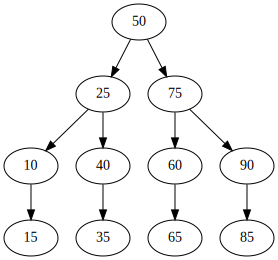

In [61]:
tree.visualize()